In [5]:
import platform; plat = platform.system()
import matplotlib; 
if plat == "Darwin":
    print("using MacOSX for matplotlib backend")
    matplotlib.use('MacOSX')
    
import os
import aplpy
import pyparsing
import pyregion
import astropy
import pickle as pk
import matplotlib.pyplot as pyplot
import numpy as np

import pixell

from asteroid_utils_pixell import minorplanet, get_desig

%load_ext autoreload
%autoreload 2

%matplotlib inline


## Get designations by name here

In [2]:
name = 'Vesta'

with open('asteroids.pk', 'rb') as f:
        #open the pickle that contains all this info. You can also do this via querries to MPL but there's no 
        #internet on compute nodes so I saved all the relevant stuff
        df = pk.load(f)

#Find the index (not MPL designation) where the asteroid name array == name
idx = np.where((df['name'] == name))[0]

#Return the designation by indexing the designation array at the same spot
desig = df['designation'][idx].values[0]
print(desig)

4


# Make Plot Here

In [3]:
desig, name, semimajor = get_desig(0)
print(name)

ast = minorplanet(name, semimajor)

ast.make_all_stacks(weight_type = 'flux')

Vesta
<_io.BufferedWriter name='/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/Vesta_flux_dict.pk'>


In [4]:
pa, freq, map_type = 'pa5', '150', 'flux'

fname = '{}_{}_{}_{}'.format(name, pa, freq, map_type)

pixell.enmap.write_map('./fits/{}.fits'.format(fname), ast.map_dict[pa][freq][map_type])

INFO: Auto-setting vmin to -3.428e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.337e+02 [aplpy.core]


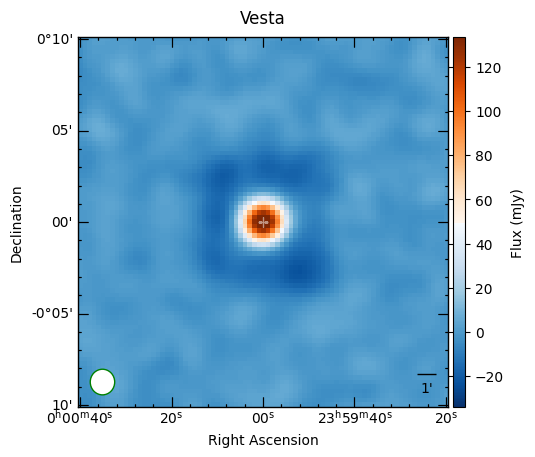

In [6]:
ast_file = './fits/{}.fits'.format(fname)
fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(ast_file, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),bottom(np.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('OrangeBlue', cmap = ListedColormap(newcolors))
cmap = 'OrangeBlue'
#######


vmin=-3
vmax=+3

#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax)
img.show_colorscale(cmap=cmap,stretch='linear')

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(1/60.0, '1\'', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0


if freq == '090': beam_major, beam_minor  = 60*2.2, 60*2.2
elif freq == '150': beam_major, beam_minor  = 60*1.401, 60*1.336
elif freq == '220': beam_major, beam_minor  = 60*1.012, 60*0.991

img.add_beam(major=beam_major/3600.0, minor=beam_minor/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(0, 0, edgecolor='white', facecolor='white',
                marker='+', s=50, linewidths=1, alpha = 0.5)


img.axis_labels.set_xtext('Right Ascension')
img.axis_labels.set_ytext('Declination')

img.set_xaxis_coord_type('longitude')

img.add_colorbar('right')
img.colorbar.set_width(0.12)
if map_type == 'snr': img.colorbar.set_axis_label_text('$\sigma$')
elif map_type == 'flux': img.colorbar.set_axis_label_text('Flux (mJy)')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]
if map_type == 'snr':
    clevels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
    img.show_contour(ast_file,colors="gray",levels=clevels, returnlevels=True,convention='calabretta',smooth=3)
img.add_label(0.5, 1.05, name, relative=True, size='large', layer='title')

img.save('./plots/{}.pdf'.format(fname),dpi=600)
img.save('./plots/{}.png'.format(fname),dpi=600)

# Depth-1 Plot

In [13]:
name = 'Vesta'

path = '/scratch/r/rbond/jorlo/actxminorplanets/sigurd/asteroids/'

pa = 'pa5'
freq = '150'

i = '253'

INFO: Auto-setting vmin to -1.596e+02 [aplpy.core]
INFO: Auto-setting vmax to  3.112e+02 [aplpy.core]


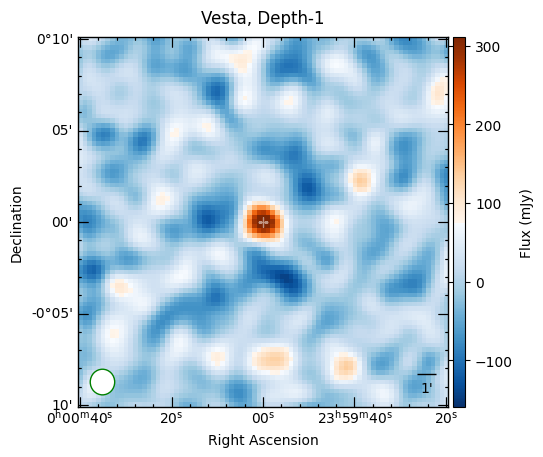

In [18]:
fname = '{}_{}_{}_{}'.format(name, pa, freq, i)

ast_file = './fits/{}.fits'.format(fname)
fig = pyplot.figure(figsize=(5, 5))
img = aplpy.FITSFigure(ast_file, hdu=0, figure=fig, downsample=1, smooth=False, convention='calabretta')
img.set_theme('publication')

# cmaps: plasma, viridis, magma, inferno, jet, gnuplot, gnuplot2, gist_earth, afmhot, gist_heat, gist_hist, gist_rainbow, nipy_spectral, cubehelix
#cmap = 'gnuplot'
#cmap = 'jet_r'
#cmap = 'inferno'
#cmap = 'PuOr_r'

## blue-orange colormap:
import matplotlib.cm as cm

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),bottom(np.linspace(0, 1, 128))))

from matplotlib.colors import ListedColormap
cm.register_cmap('OrangeBlue', cmap = ListedColormap(newcolors))
cmap = 'OrangeBlue'
#######


vmin=-3
vmax=+3

#img.show_colorscale(cmap=cmap,stretch='linear',vmin=vmin,vmax=vmax)
img.show_colorscale(cmap=cmap,stretch='linear')

#img.tick_labels.show()
#img.tick_labels.set_xformat('hh:mm:ss.ss')
#img.tick_labels.set_yformat('dd:mm:ss.s')
img.ax.tick_params(axis='both',which='both',direction='in')

matplotlib.rcParams['lines.linewidth'] = 3.0
img.add_scalebar(1/60.0, '1\'', color='black')

matplotlib.rcParams['lines.linewidth'] = 2.0


if freq == '090': beam_major, beam_minor  = 60*2.2, 60*2.2
elif freq == '150': beam_major, beam_minor  = 60*1.401, 60*1.336
elif freq == '220': beam_major, beam_minor  = 60*1.012, 60*0.991

img.add_beam(major=beam_major/3600.0, minor=beam_minor/3600.0, angle=0)
img.beam.set_color('white')
img.beam.set_edgecolor('green')
img.beam.set_facecolor('white')
img.beam.set_corner('bottom left')


img.show_markers(0, 0, edgecolor='white', facecolor='white',
                marker='+', s=50, linewidths=1, alpha = 0.5)


img.axis_labels.set_xtext('Right Ascension')
img.axis_labels.set_ytext('Declination')

img.set_xaxis_coord_type('longitude')

img.add_colorbar('right')
img.colorbar.set_width(0.12)
img.colorbar.set_axis_label_text('Flux (mJy)')

matplotlib.rcParams['lines.linewidth'] = 0.5

#clevels=[-250e-6, -200e-6, -150e-6, -100e-6, -50e-6, 0, 50e-6, 100e-6, 150e-6, 200e-6, 250e-6]
#clevels=[-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250]

img.add_label(0.5, 1.05, '{}, Depth-1'.format(name), relative=True, size='large', layer='title')

img.save('./plots/{}.pdf'.format(fname),dpi=600)
img.save('./plots/{}.png'.format(fname),dpi=600)

# Making Fits for all asteroids

In [ ]:
for i in range(1200):
    
    pa, freq, map_type = 'pa5', '090', 'flux'
    fname = '{}_{}_{}_{}'.format(name, pa, freq, map_type)
    
    
    desig, name, semimajor = get_desig(i)
    print(name)
    #print(os.path.exists('./fits/{}.fits'.format(fname)))
    if os.path.exists('./fits/{}.fits'.format(fname)): continue
    ast = minorplanet(name, semimajor)

    ast.make_all_stacks(weight_type = 'flux')
    
    try:
        sn90 = np.mean([ast.flux_dict['pa5']['090']['flux'],ast.flux_dict['pa6']['090']['flux']])/np.sqrt(ast.flux_dict['pa6']['090']['var']**2 + ast.flux_dict['pa5']['090']['var']**2)
        sn150 = np.mean([ast.flux_dict['pa4']['150']['flux'], ast.flux_dict['pa5']['150']['flux'],ast.flux_dict['pa6']['150']['flux']])/np.sqrt(ast.flux_dict['pa4']['150']['var']**2 + ast.flux_dict['pa5']['150']['var']**2+ ast.flux_dict['pa6']['150']['var']**2)
        sn220 = ast.flux_dict['pa4']['220']['flux'] / ast.flux_dict['pa4']['220']['var']
    except: continue
    print(sn90, sn150, sn220)
    
    if sn90<3 and sn150<3 and sn220<3: continue
    
    pa, freq, map_type = 'pa5', '090', 'flux'
    fname = '{}_{}_{}_{}'.format(name, pa, freq, map_type)
    pixell.enmap.write_map('./fits/{}.fits'.format(fname), ast.map_dict[pa][freq][map_type])
    
    pa, freq, map_type = 'pa6', '090', 'flux'
    fname = '{}_{}_{}_{}'.format(name, pa, freq, map_type)
    pixell.enmap.write_map('./fits/{}.fits'.format(fname), ast.map_dict[pa][freq][map_type])
    
    pa, freq, map_type = 'pa4', '150', 'flux'
    fname = '{}_{}_{}_{}'.format(name, pa, freq, map_type)
    pixell.enmap.write_map('./fits/{}.fits'.format(fname), ast.map_dict[pa][freq][map_type])
    
    pa, freq, map_type = 'pa5', '150', 'flux'
    fname = '{}_{}_{}_{}'.format(name, pa, freq, map_type)
    pixell.enmap.write_map('./fits/{}.fits'.format(fname), ast.map_dict[pa][freq][map_type])
    
    pa, freq, map_type = 'pa6', '150', 'flux'
    fname = '{}_{}_{}_{}'.format(name, pa, freq, map_type)
    pixell.enmap.write_map('./fits/{}.fits'.format(fname), ast.map_dict[pa][freq][map_type])
    
    pa, freq, map_type = 'pa4', '220', 'flux'
    fname = '{}_{}_{}_{}'.format(name, pa, freq, map_type)
    pixell.enmap.write_map('./fits/{}.fits'.format(fname), ast.map_dict[pa][freq][map_type])

Vesta
Ceres
Pallas
Juno
Iris
Hebe
Eunomia
Eros
Melpomene
<_io.BufferedWriter name='/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/Melpomene_flux_dict.pk'>
1.1500094650978046 3.4748496219623717 4.318083701444124
Flora
Metis
Amphitrite
Herculina
Massalia
Hygiea
Irene
Dembowska
Laetitia
<_io.BufferedWriter name='/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/Laetitia_flux_dict.pk'>
3.8799555317178105 5.18250246865688 8.817196621976109
Euterpe
Julia
Parthenope
Psyche
Bamberga
Victoria
Nysa
Pluto
<_io.BufferedWriter name='/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/Pluto_flux_dict.pk'>
0.25822378306738 1.091795767063842 -0.3900766391740511
Nausikaa
<_io.BufferedWriter name='/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/Nausikaa_flux_dict.pk'>
0.6440791832603384 0.7029016639732061 -0.7462055992993228
Eleonora
<_io.BufferedWriter name='/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/Eleonora_flux_dict.pk'>
3.0414159274908674 2.7199323346875626 5.753379016

<_io.BufferedWriter name='/scratch/r/rbond/jorlo/actxminorplanets/sigurd/fluxes/Diotima_flux_dict.pk'>
4.317945535337717 4.619970338103754 8.566678497209068
Danae
Sirona
